# NAME: SAGAR SURYAKANT DHURI
# TASK NO 2: MUSIC RECOMMENDATION

# Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [ ]:
sns.set_style("whitegrid")

In [3]:
warnings.filterwarnings("ignore")

# Importing URL

In [2]:
songs=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Music recommen/songs.csv')
song_extra_info=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Music recommen/song_extra_info.csv')
train=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Music recommen/train.csv')
members=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Music recommen/members.csv')


# Merging Datasets

In [5]:
rs=pd.merge(train,songs,on='song_id',how='left')

In [6]:
rsse=pd.merge(rs,song_extra_info,on='song_id',how='left')

In [7]:
songs_df=pd.merge(rsse,members,on='msno',how='left')

# Diplaying the datasets

In [10]:
songs.head()


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [11]:
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [12]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [13]:
song_extra_info.tail()

,song_id,name,isrc
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095
2295970,DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=,Like This,US5UL1512426


In [14]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [15]:
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1
7377417,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,Ju0VGkjWeBUZCd7r5Az2hUImhMoWxWLUicOedsmvG0g=,discover,Discover Genre,online-playlist,1


In [16]:
members.head()


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [17]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


# Data Cleaning 

In [22]:
songs['genre_ids'].is_unique 



False

In [23]:
song_extra_info['song_id'].is_unique

True

In [24]:
train['song_id'].is_unique

False

In [25]:
members['msno'].is_unique

True

In [26]:
songs.loc[3]

song_id        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=
song_length                                          273554
genre_ids                                               465
artist_name                                           S.H.E
composer                                                湯小康
lyricist                                                徐世珍
language                                                3.0
Name: 3, dtype: object

In [29]:
songs.loc[3:, 'genre_ids'].head(10)

3                 465
4                 726
5     864|857|850|843
6                 458
7                 465
8                 465
9            352|1995
10               2157
11                465
12                726
Name: genre_ids, dtype: object

In [30]:
print(songs.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
2296315    False
2296316    False
2296317    False
2296318    False
2296319    False
Length: 2296320, dtype: bool


In [35]:
print(songs.info(),song_extra_info.info(),train.info(),members.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         obj

In [36]:
print(songs.isnull(),song_extra_info.isnull(),train.isnull(),members.isnull())

         song_id  song_length  genre_ids  artist_name  composer  lyricist  \
0          False        False      False        False     False     False   
1          False        False      False        False     False     False   
2          False        False      False        False      True      True   
3          False        False      False        False     False     False   
4          False        False      False        False     False     False   
...          ...          ...        ...          ...       ...       ...   
2296315    False        False      False        False     False      True   
2296316    False        False      False        False      True      True   
2296317    False        False      False        False      True      True   
2296318    False        False      False        False      True      True   
2296319    False        False      False        False      True      True   

         language  
0           False  
1           False  
2           Fal

In [37]:
print(songs.dropna(),song_extra_info.dropna(),train.dropna(),members.dropna())

                                              song_id  song_length  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329   
5        kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=       235520   
...                                               ...          ...   
2296273  G4CFe4RcqGuNFxZ+kxPrjsafx8+bI5kbjqy1pcKMyCY=       113684   
2296294  LIBVFt9mqBUtZu911th7hIuQ6ecZJEZYr3k8drsqEGI=       309404   
2296302  9w0/At83TBWVHIMHJsLWc4XkSt6rtQWrhgPS5VkDGBw=       167481   
2296305  +HEDP6j6Pp6/uWt4yUtDnwVUdN/7yjSAxP/c2K8ff1A=       281077   
2296307  zH1JEkk62Zn1a4cn89jNoNnKgPZ8jzQrlCu4+u/UC90=       235728   

               genre_ids       artist_name  \
0                    465  張信哲 (Jeff Chang)   
1                    444         BLACKPINK   
3                    

In [39]:
#Replacing Values
from numpy import NaN
print(songs.replace({NaN:0.00}),song_extra_info.replace({NaN:0.00}),train.replace({NaN:0.00}),members.replace({NaN:0.00}))

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

# Filling Values

In [41]:
print(songs.fillna(3),song_extra_info.fillna(988),train.fillna(6),members.fillna(44))

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

# Displaying the shape

In [25]:
print("Rows:",songs.shape[0],"Cols:",songs.shape[1]) 
print("Rows:",song_extra_info.shape[0],"Cols:",song_extra_info.shape[1])
print("Rows:",train.shape[0],"Cols:",train.shape[1]) 
print("Rows:",members.shape[0],"Cols:",members.shape[1])

Rows: 2296320 Cols: 7
Rows: 2295971 Cols: 3
Rows: 7377418 Cols: 6
Rows: 34403 Cols: 7


# EDA OF DATASETS

In [28]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [29]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [30]:
songs.duplicated().sum()

0

In [34]:
print(songs['language'].unique()) 

print(train['source_type'].unique())

print(members['gender'].unique())

[ 3. 31. 52. 17. 10. -1. 24. 59. 45. 38. nan]
['online-playlist' 'local-playlist' 'local-library' 'top-hits-for-artist'
 'album' nan 'song-based-playlist' 'radio' 'song' 'listen-with' 'artist'
 'topic-article-playlist' 'my-daily-playlist']
[nan 'female' 'male']


<Figure size 1296x1152 with 0 Axes>

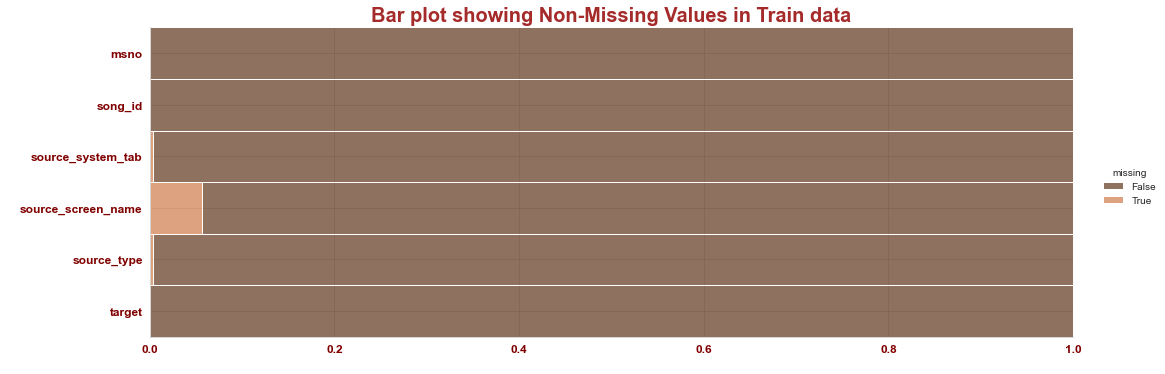

In [10]:
plt.figure(figsize=(18,16))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='copper' 
)
plt.title('Bar plot showing Non-Missing Values in Train data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

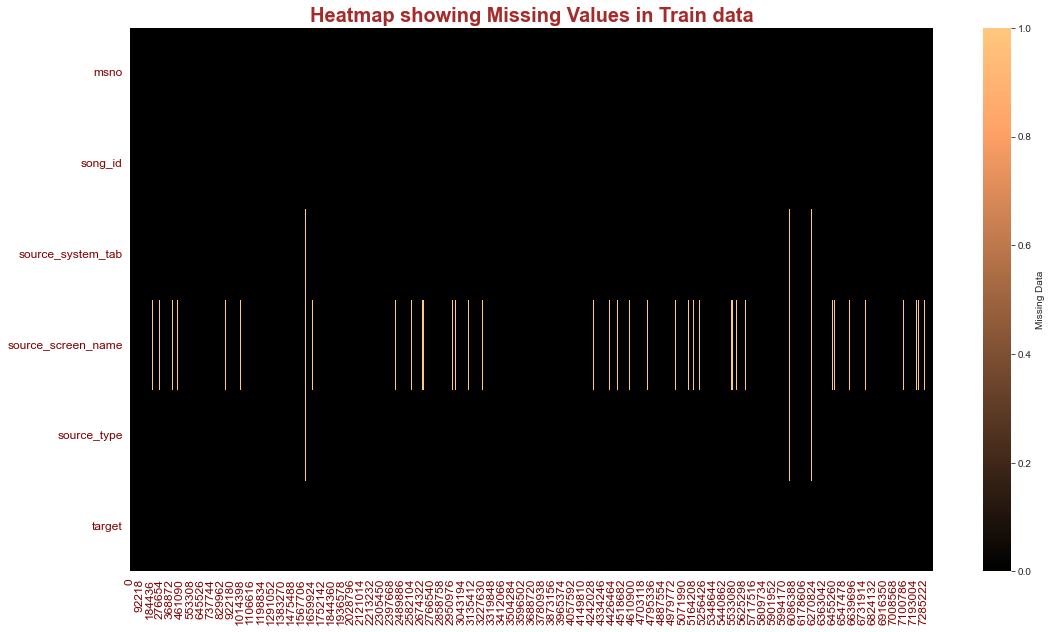

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(train.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in Train data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'maroon')
plt.yticks(size = 12, color = 'maroon')
plt.show();

# Counts of missing values in members vs song_extra_info

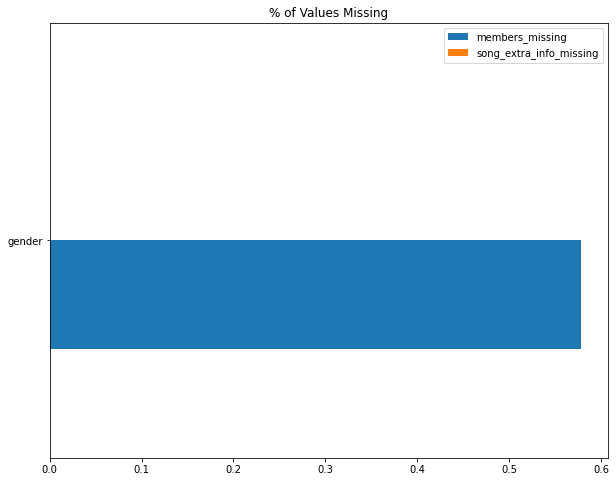

In [8]:
ncounts = pd.DataFrame([members.isna().mean(), song_extra_info.isna().mean()]).T
ncounts = ncounts.rename(columns={0: "members_missing", 1: "song_extra_info_missing"})

ncounts.query("members_missing > 0").plot(
    kind="barh", figsize=(10, 8), title="% of Values Missing"
)
plt.show()

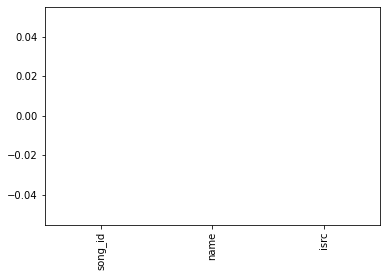

In [4]:
song_extra_info.dropna(inplace = True)
song_extra_info.isnull().sum().plot.bar()
plt.show()

In [5]:
song_extra_info = song_extra_info.drop(['song_id', 'isrc'], axis = 1)


In [3]:
floats = []
for col in songs.columns:
    if songs[col].dtype == 'float':
        floats.append(col)

len(floats)

1

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


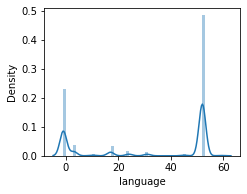

In [4]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sns.distplot(songs[col])
plt.tight_layout()
plt.show()

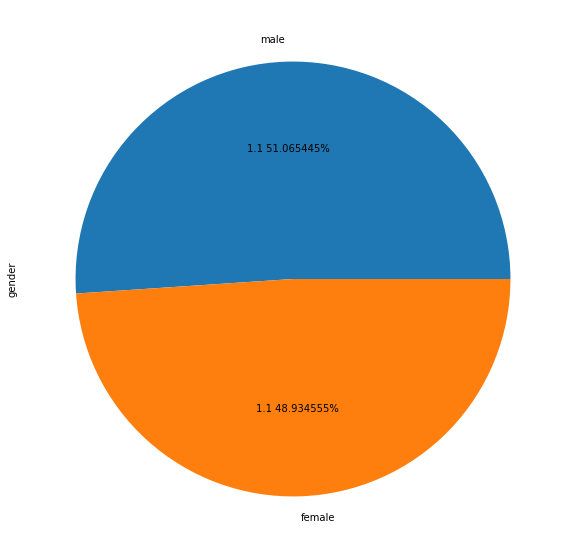

In [5]:
plt.figure(figsize=(15,10))
members['gender'].value_counts().plot.pie(autopct='1.1 %f%%')
plt.show()

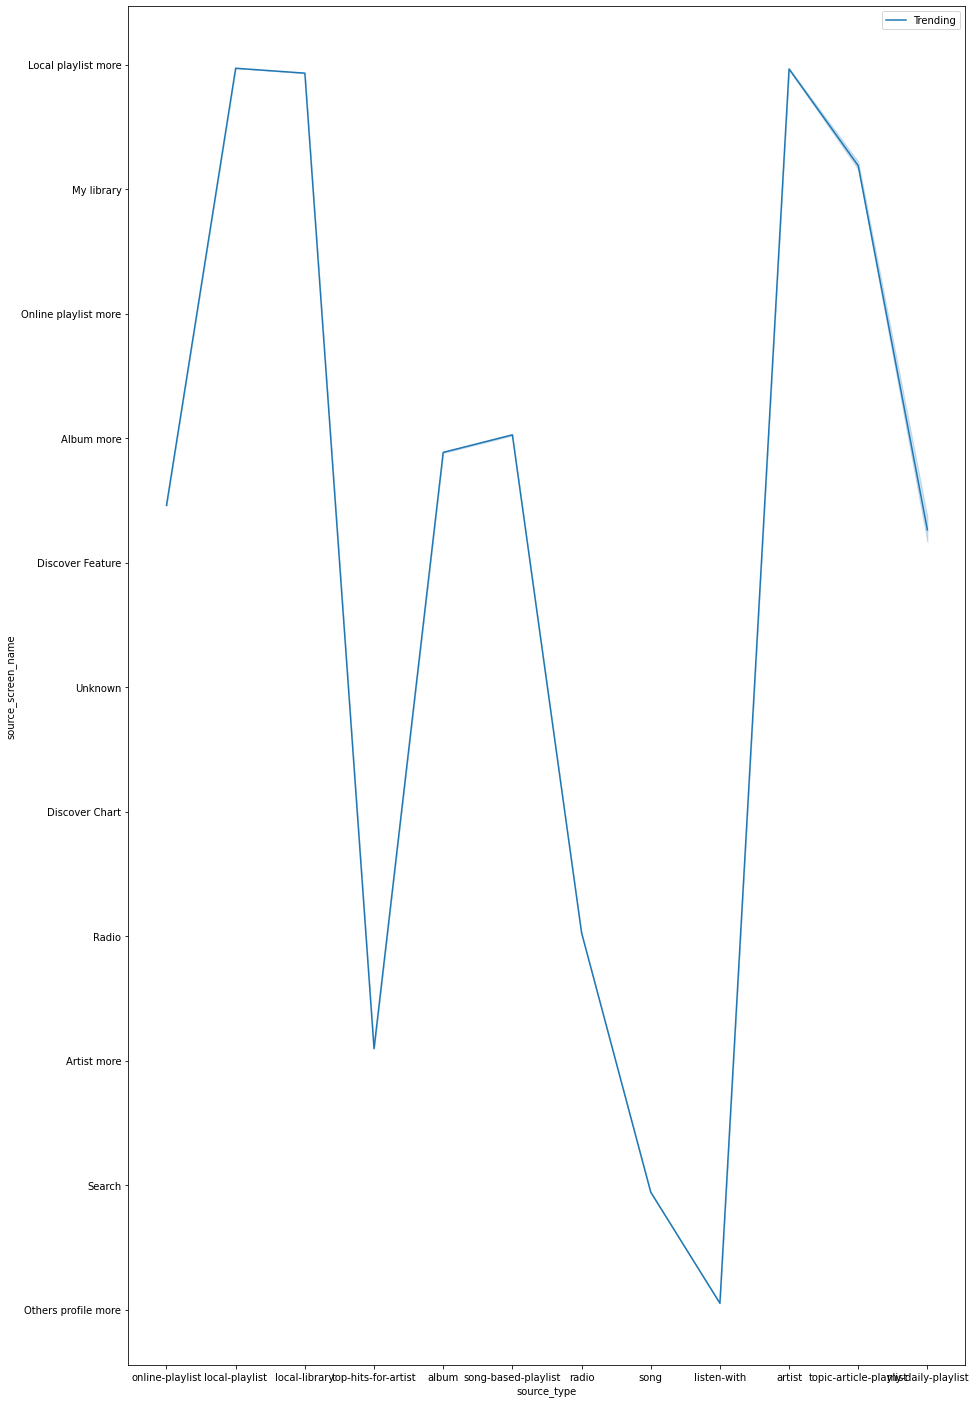

In [6]:
plt.figure(figsize=(15,25))
sns.lineplot(x='source_type',y='source_screen_name',label='Trending',data=train)
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\1789982412.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35388 (\N{CJK UNIFIED IDEOGRAPH-8A3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32882 (\N{CJK UNIFIED IDEOGRAPH-8072}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\

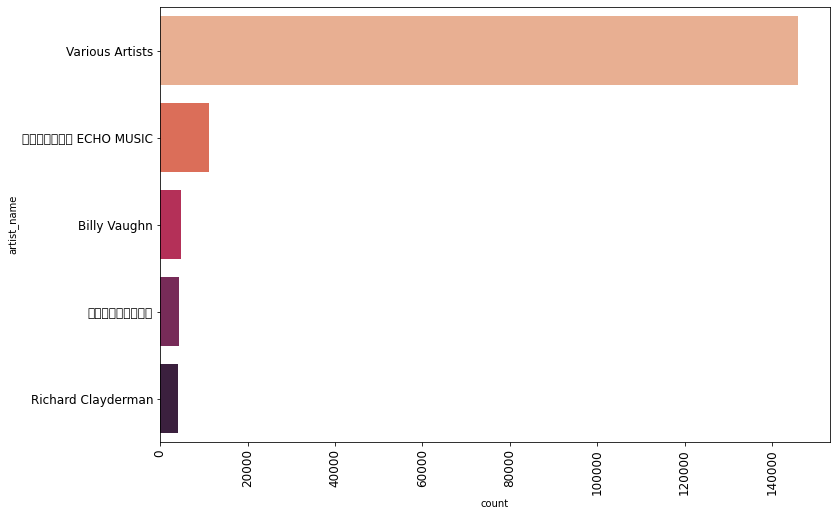

In [32]:
fig = plt.figure(figsize =(12,8))
sns.countplot(y=songs['artist_name'],palette='rocket_r',
    order= songs['artist_name'].value_counts()[0:5].index) 
plt.xticks(rotation=90,size=12)
plt.yticks(rotation=0,size=12)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_13440\3677284862.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


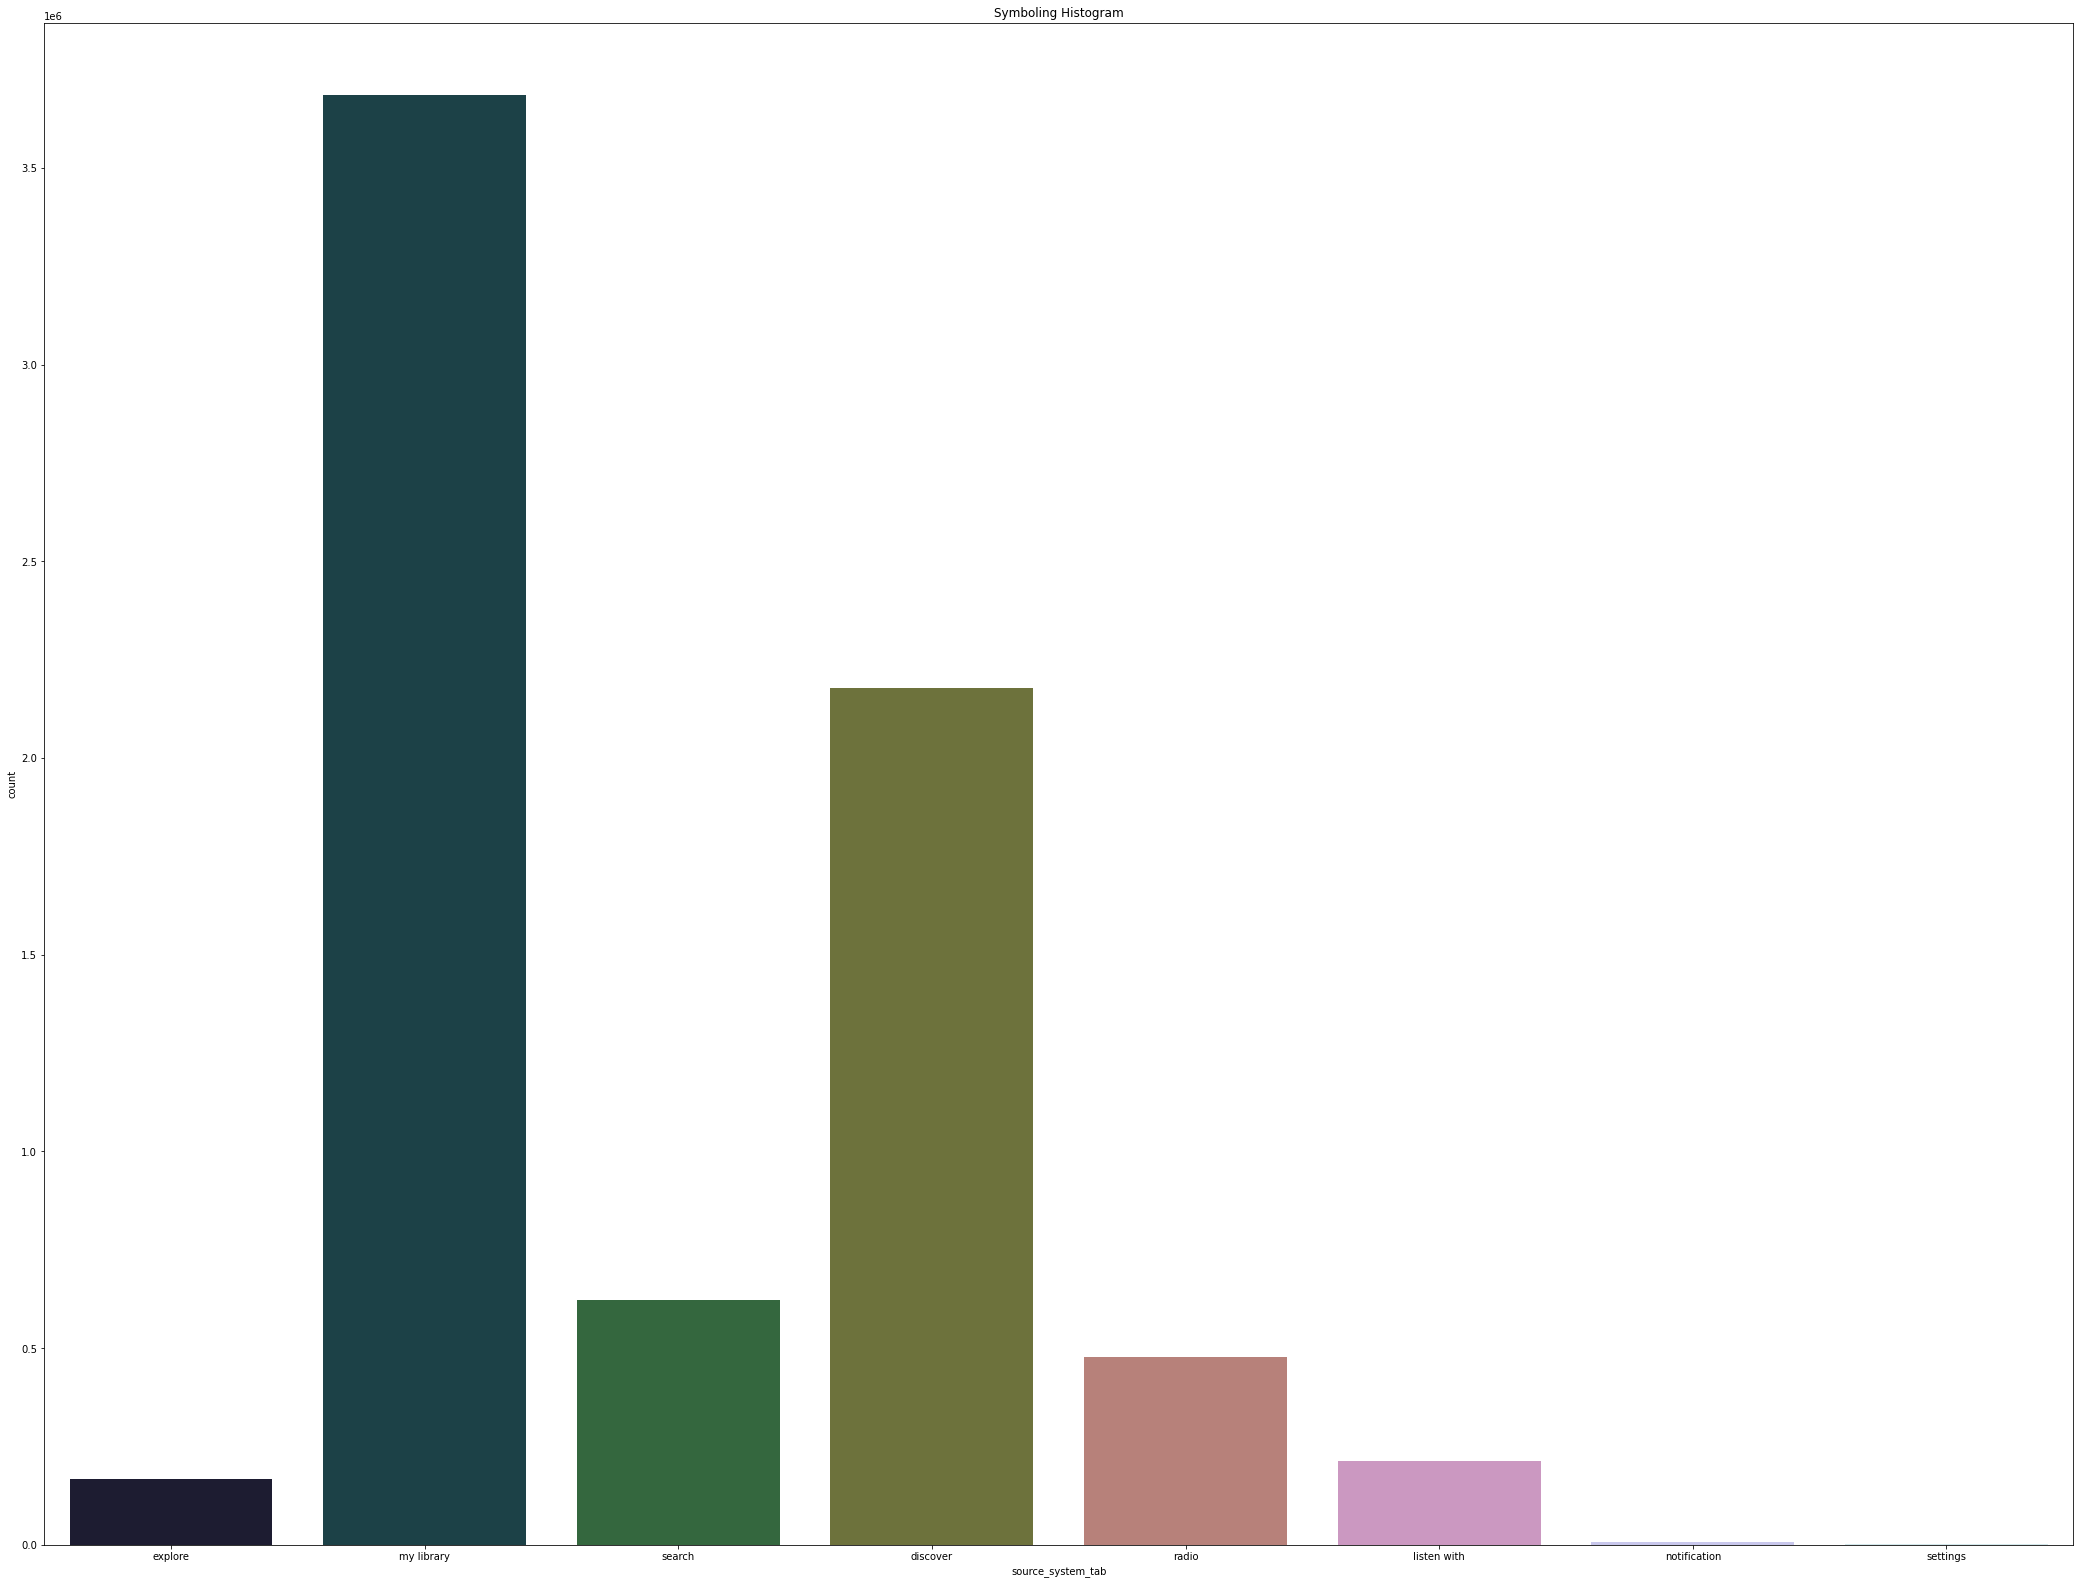

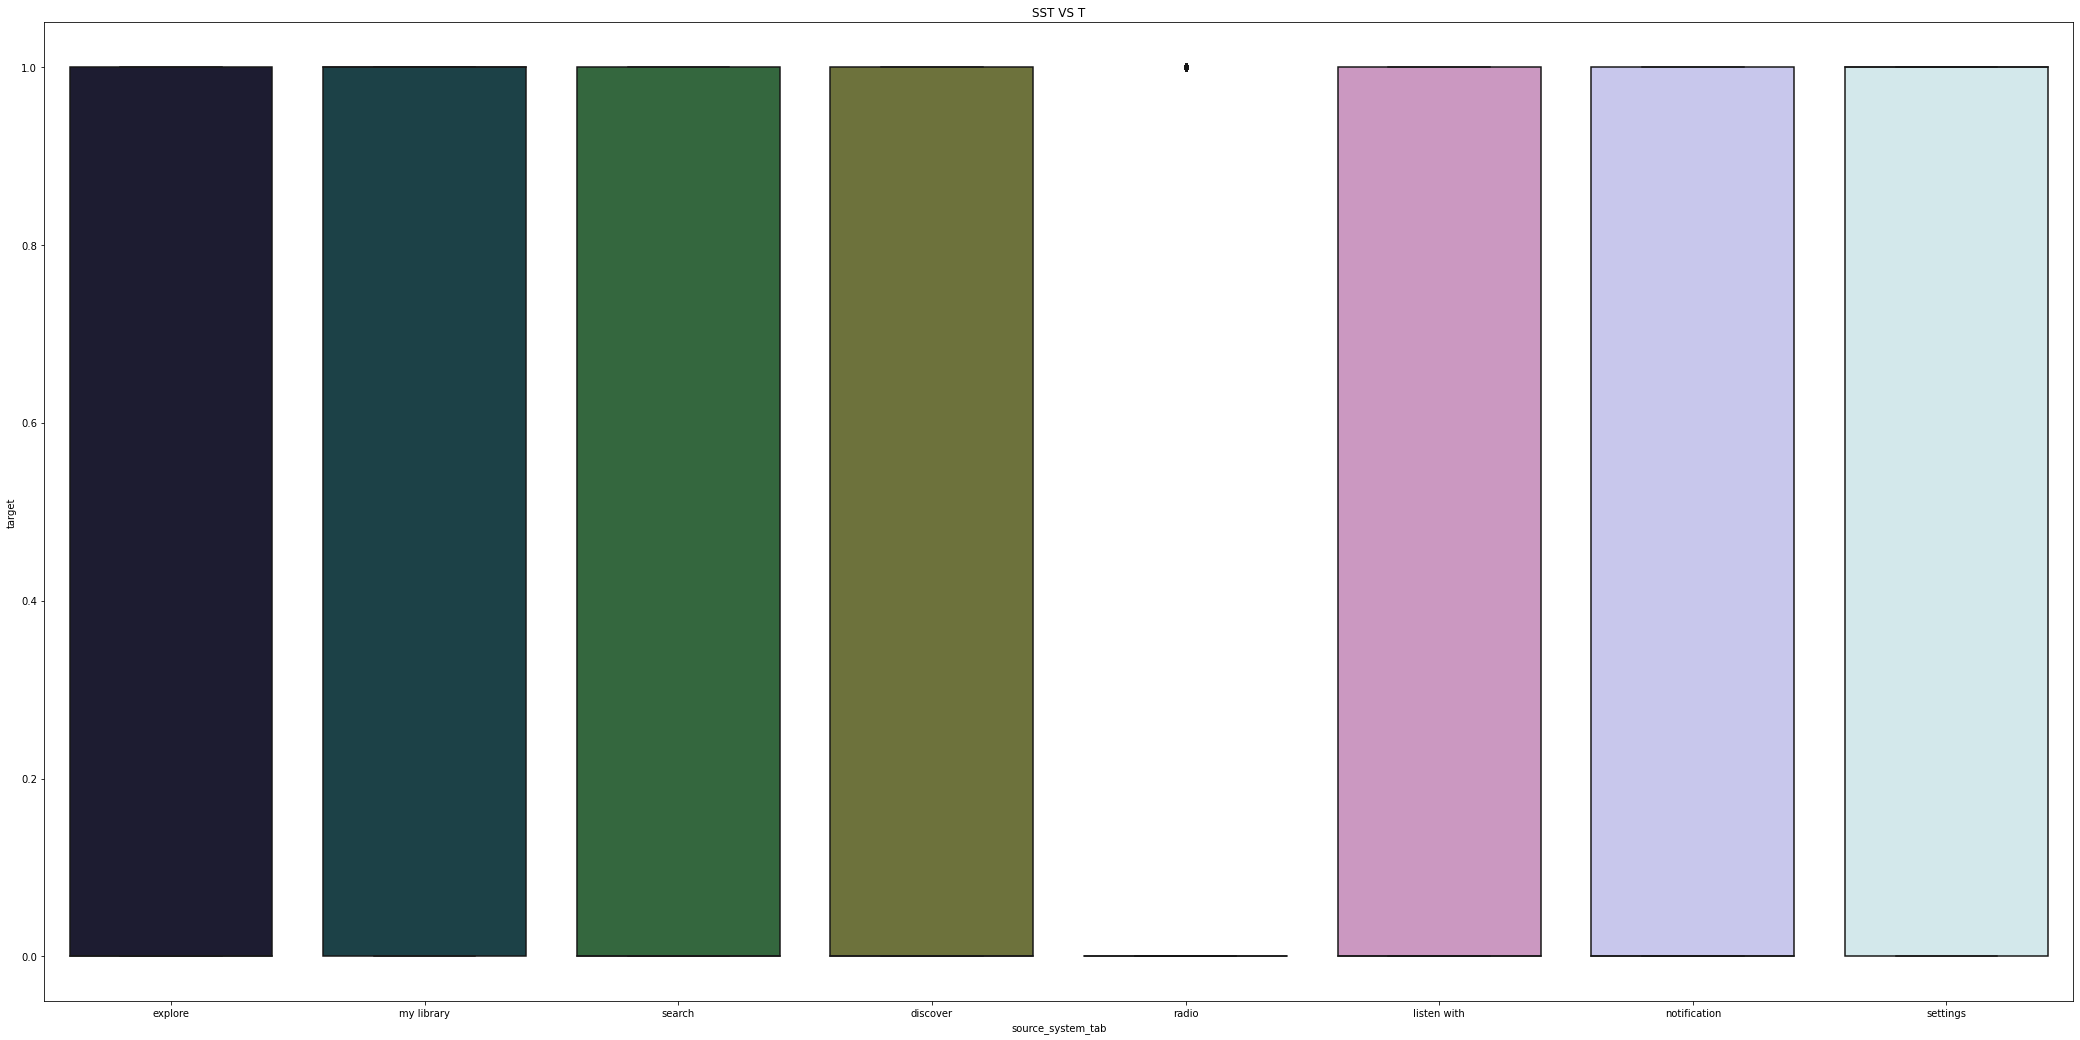

In [37]:
fig = plt.figure(figsize =(80,28)) 
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(train.source_system_tab,palette=("cubehelix"))

fig = plt.figure(figsize =(80,18)) 
plt.subplot(1,2,2)
plt.title('SST VS T')
sns.boxplot(x=train.source_system_tab,y=train.target,palette=("cubehelix")) 

plt.show()



<AxesSubplot:>

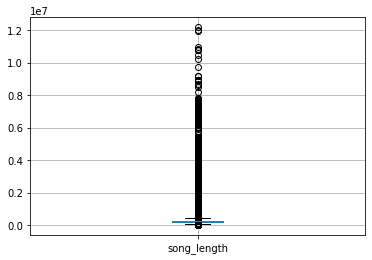

In [5]:
#Boxplot

songs[['song_length']].boxplot()

# FEATURE ENGINEERING

In [4]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = songs['language'].mean () + songs['language'].std () * factor
lower_lim = train['target'].mean () - train['target'].std () * factor

songs= songs[(songs['language'] < upper_lim) & (train['target'] > lower_lim)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_19812\3626324522.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs= songs[(songs['language'] < upper_lim) & (train['target'] > lower_lim)]


In [7]:
#Dropping the outlier rows with Percentiles

upper_lim = songs['language'].quantile(.95)
lower_lim = train['target'].quantile(.05)

songs = songs[(songs['language'] < upper_lim) & (train['target'] > lower_lim)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_19812\3388235530.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs = songs[(songs['language'] < upper_lim) & (train['target'] > lower_lim)]


# BINNING

In [18]:
#Numerical Binning Example
members['bin'] = pd.cut(members['registered_via'], bins=[0,10,15,20], labels=["Low", "Mid", "High"])

# One Hot Encoding

In [22]:
encoded_columns = pd.get_dummies(members['gender'])
members = members.join(encoded_columns).drop('gender', axis=1)

# Categorical Column Grouping

In [28]:
train.groupby('source_system_tab').agg(lambda x: x.value_counts().index[0])

,msno,song_id,source_screen_name,source_type,target
source_system_tab,,,,,
discover,LThaiVqGGnVTPmTcmwN/LLo4fVb5dzkduzd7s1SgzIA=,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,Online playlist more,online-playlist,0
explore,6aH1YAi5YwvZUHtpjEaMQwM0p4wP4XLrkWQSdXDF9L8=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,Explore,online-playlist,0
listen with,1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,Others profile more,listen-with,0
my library,o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,Local playlist more,local-library,1
notification,uJLfbaxwYGojx3wlcptcMIuaehtrIs0fz3jO2GCGxFI=,h3v1qdH9EaL0U5yvS2HnycFl37Z2vbBIoFx+i/b3wSU=,Album more,album,0
radio,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,Qp8JP1AroVF2GStC3YzKtnJNY4NC4cqyGtafi6ed7Xo=,Radio,radio,0
search,gxxBbzV3eE2XGjUrFVB2FzAve55Oe1s86HD+OEh36Gw=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,Artist more,top-hits-for-artist,0
settings,1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,Local playlist more,local-library,1
